In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%cd ..


c:\Users\troosma\Documents\Ylikool\6. semester\Bakatöö\bakatoo


In [2]:
import sys
import os

import numpy as np
import pandas as pd
import random
import tensorflow as tf

from tensorflow import keras
from keras import layers

from matplotlib import pyplot as plt
import seaborn as sns

from scripts.CustomCallbacks import CustomLogger
import scripts.utils as utils
import scripts.Slopes as Slopes

from tqdm import tqdm
import json
utils.reset_seeds(0)


In [22]:
path = os.path.join("andmed\const_func_uniform_data")
plot_paths = []
mse_paths = []

for root, dirs, files in os.walk(path):
    for filename in files:
        if filename.endswith(".png"):
            plot_paths.append(os.path.join(root, filename))
        if filename.endswith(".json"):
            mse_paths.append(os.path.join(root, filename))
        # print(os.path.join(root, filename))
        # print(type(os.path.join(root, filename)))

In [23]:
collector = {}
for mse_path in mse_paths:
    # look up 2 levels up and group the files by that folder
    upper = os.path.dirname(os.path.dirname(mse_path))
    
    with open(mse_path, 'r') as f:
        mse = json.load(f)

    if upper not in collector:
        collector[upper] = []
    collector[upper].append(mse)

betterone = {}
for key, value in collector.items():
    model_size = os.path.split(key)[-1]

    temp1 = []# 'mse_treeningul'
    temp2 = []#'mse_grid_testil'
    temp3 = [] #'mse_treening_andmete_teine_myra'
    for mse in value:
        temp1.append(mse['mse_treeningul'])
        temp2.append(mse['mse_grid_testil'])
        temp3.append(mse['mse_treening_andmete_teine_myra'])
    betterone[model_size] = [int(model_size),
                             np.mean(temp1), np.var(temp1), 
                             np.mean(temp2), np.var(temp2),
                             np.mean(temp3), np.var(temp3)]
    

df = pd.DataFrame.from_dict(betterone, orient='index', columns=['model_size', 'mse_treeningul', 'mse_treeningul_var', 'mse_grid_testil', 'mse_grid_testil_var', 'mse_treening_andmete_teine_myra', 'mse_treening_andmete_teine_myra_var'])
df.sort_values(by=['model_size'], inplace=True,)
df.head(100)

,model_size,mse_treeningul,mse_treeningul_var,mse_grid_testil,mse_grid_testil_var,mse_treening_andmete_teine_myra,mse_treening_andmete_teine_myra_var
10,10,1.071066,0.248999,6.182415,24.440141,3.310199,1.124401
20,20,3.068048,4.849861,3.687456,0.483208,3.223356,0.517273
30,30,3.507534,2.376467,3.354981,0.029679,3.149024,0.738705
40,40,2.226669,0.469982,3.838998,0.377158,3.500350,0.593404
50,50,2.598544,0.388676,3.179959,0.002427,2.997958,0.100531
60,60,2.803109,1.126237,3.221880,0.009552,2.995190,0.122893
70,70,2.394871,0.354442,3.196225,0.006729,2.934918,0.071961
80,80,2.326423,0.189368,3.189381,0.002879,2.936040,0.096064
90,90,2.823808,0.462491,3.183267,0.007261,2.981112,0.071926
100,100,3.096005,1.024577,3.310969,0.054886,3.078169,0.045369


In [24]:
df[['mse_treeningul', 'mse_grid_testil', 'mse_treening_andmete_teine_myra']].head(36)

,mse_treeningul,mse_grid_testil,mse_treening_andmete_teine_myra
10,1.071066,6.182415,3.310199
20,3.068048,3.687456,3.223356
30,3.507534,3.354981,3.149024
40,2.226669,3.838998,3.500350
50,2.598544,3.179959,2.997958
60,2.803109,3.221880,2.995190
70,2.394871,3.196225,2.934918
80,2.326423,3.189381,2.936040
90,2.823808,3.183267,2.981112
100,3.096005,3.310969,3.078169


<AxesSubplot: xlabel='model_size'>

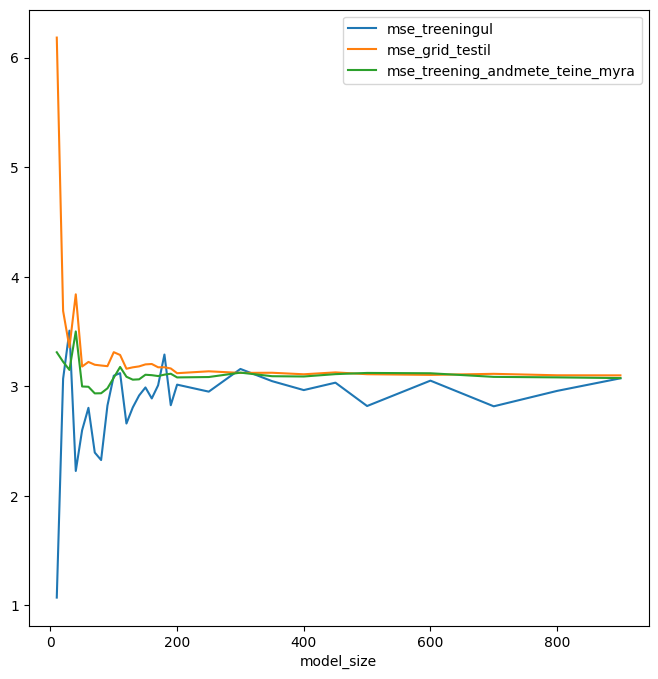

In [25]:
df[df.model_size<1000].plot(x='model_size', y=['mse_treeningul', 'mse_grid_testil', 'mse_treening_andmete_teine_myra'], figsize=(8, 8), logy=False,)

<AxesSubplot: xlabel='model_size'>

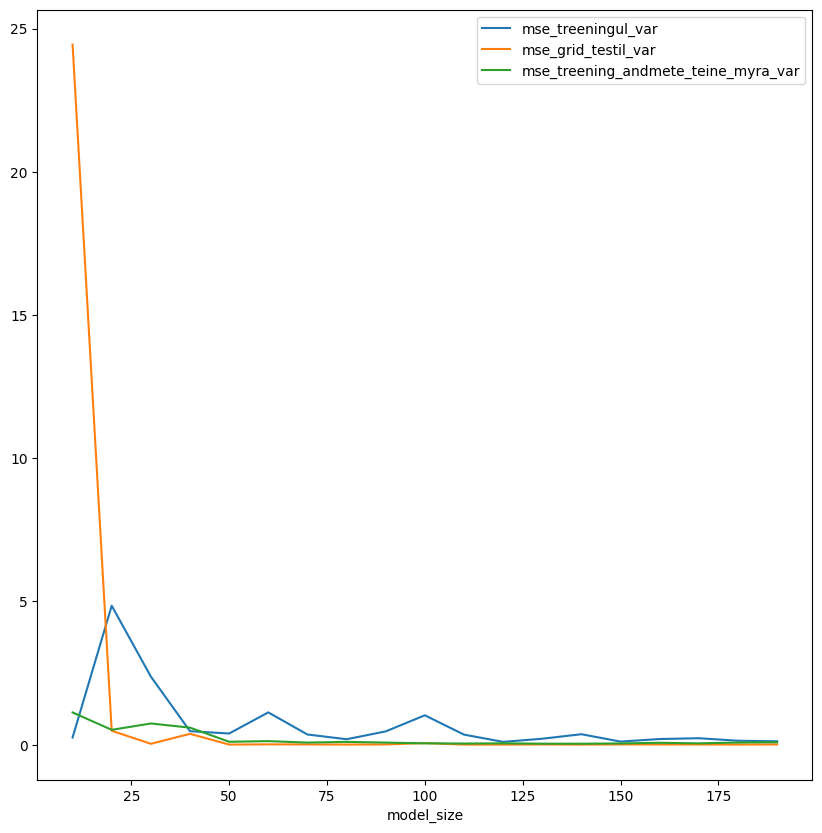

In [55]:
df[df.model_size<200].plot(x='model_size', y=['mse_treeningul_var', 'mse_grid_testil_var', 'mse_treening_andmete_teine_myra_var'], figsize=(10, 10), logy=False,)

## Plottide kombineerimine

In [19]:
from PIL import Image

In [10]:
def combiner(p1, p2, out):# Open the two images
    image1 = Image.open(p1)
    image2 = Image.open(p2)

    width, height = image1.size

    image2 = image2.resize((int(width/8.35*10.51), height))

    new_image = Image.new('RGB', (width, height*2))

    new_image.paste(image1, (0, 0))

    new_image.paste(image2, (-90, height))

    new_image.save(out)

    # ülemine on 10.5 cm
    # all on 8.35 cm
    #/10.5*11.5	
#combiner(plot_paths[0], plot_paths[176], "combined.png")

In [95]:
path = os.path.join("andmed\const_func_uniform_data\plots\combined")
if not os.path.exists(path):
    os.makedirs(path)

for i in range(int(len(plot_paths)/2)):
    #print(plot_paths[i])
    #print(plot_paths[i+int(len(plot_paths)/2)])
    combiner(plot_paths[i], plot_paths[i+int(len(plot_paths)/2)],
             os.path.join(path, os.path.split(plot_paths[i])[-1]))
    # print(plot_paths.index(os.path.split(path)[-1]))
    

## Teistel andmetel

In [6]:
path = os.path.join("andmed\\vaiksem_uneven")
plot_paths = []
mse_paths = []

for root, dirs, files in os.walk(path):
    for filename in files:
        if filename.endswith(".png"):
            plot_paths.append(os.path.join(root, filename))
        if filename.endswith(".json"):
            mse_paths.append(os.path.join(root, filename))
        # print(os.path.join(root, filename))
        # print(type(os.path.join(root, filename)))

In [17]:
collector = {}
for mse_path in mse_paths:
    # look up 2 levels up and group the files by that folder
    upper = os.path.dirname(os.path.dirname(mse_path))
    
    with open(mse_path, 'r') as f:
        mse = json.load(f)

    if upper not in collector:
        collector[upper] = []
    collector[upper].append(mse)

betterone = {}
for key, value in collector.items():
    model_size = os.path.split(key)[-1]
    temp1 = []# 'mse_treeningul'
    temp2 = []#'mse_grid_testil'
    temp3 = [] #'mse_treening_andmete_teine_myra'
    for mse in value:
        temp1.append(mse['mse_treeningul'])
        temp2.append(mse['mse_grid_testil'])
        temp3.append(mse['mse_treening_andmete_teine_myra'])
    betterone[model_size] = [model_size,
                             np.mean(temp1), np.var(temp1), 
                             np.mean(temp2), np.var(temp2),
                             np.mean(temp3), np.var(temp3)]
    

df = pd.DataFrame.from_dict(betterone, orient='index', columns=['model_size', 'mse_treeningul', 'mse_treeningul_var', 'mse_grid_testil', 'mse_grid_testil_var', 'mse_treening_andmete_teine_myra', 'mse_treening_andmete_teine_myra_var'])
df.sort_values(by=['model_size'], inplace=True,)
df.head(10)

,model_size,mse_treeningul,mse_treeningul_var,mse_grid_testil,mse_grid_testil_var,mse_treening_andmete_teine_myra,mse_treening_andmete_teine_myra_var
0,0,2.873289,0.345277,3.199239,0.003147,3.144300,0.405894
1,1,3.089095,0.467079,3.201967,0.007418,3.176004,0.639793
2,2,3.021990,0.477924,3.182187,0.002551,3.138144,0.621145
3,3,2.986551,0.458619,3.211257,0.007451,3.158355,0.634676
4,4,3.044803,0.452335,3.178083,0.004609,3.224958,0.651778


In [ ]:
collector = {}
for mse_path in mse_paths:
    # look up 2 levels up and group the files by that folder
    upper = os.path.dirname(os.path.dirname(mse_path))
    
    with open(mse_path, 'r') as f:
        mse = json.load(f)

    if upper not in collector:
        collector[upper] = []
    collector[upper].append(mse)

betterone = {}
for key, value in collector.items():
    model_size = os.path.split(key)[-1]
    temp1 = []# 'mse_treeningul'
    temp2 = []#'mse_grid_testil'
    temp3 = [] #'mse_treening_andmete_teine_myra'
    for mse in value:
        temp1.append(mse['mse_treeningul'])
        temp2.append(mse['mse_grid_testil'])
        temp3.append(mse['mse_treening_andmete_teine_myra'])
    betterone[model_size] = [model_size,
                             np.mean(temp1), np.var(temp1), 
                             np.mean(temp2), np.var(temp2),
                             np.mean(temp3), np.var(temp3)]
    

df = pd.DataFrame.from_dict(betterone, orient='index', columns=['model_size', 'mse_treeningul', 'mse_treeningul_var', 'mse_grid_testil', 'mse_grid_testil_var', 'mse_treening_andmete_teine_myra', 'mse_treening_andmete_teine_myra_var'])
df.sort_values(by=['model_size'], inplace=True,)
df.head(10)

,model_size,mse_treeningul,mse_treeningul_var,mse_grid_testil,mse_grid_testil_var,mse_treening_andmete_teine_myra,mse_treening_andmete_teine_myra_var
0,0,2.873289,0.345277,3.199239,0.003147,3.144300,0.405894
1,1,3.089095,0.467079,3.201967,0.007418,3.176004,0.639793
2,2,3.021990,0.477924,3.182187,0.002551,3.138144,0.621145
3,3,2.986551,0.458619,3.211257,0.007451,3.158355,0.634676
4,4,3.044803,0.452335,3.178083,0.004609,3.224958,0.651778


In [20]:
path = os.path.join("andmed\\vaiksem_uneven\plots\combined")
if not os.path.exists(path):
    os.makedirs(path)

for i in range(int(len(plot_paths)/2)):
    #print(plot_paths[i])
    #print(plot_paths[i+int(len(plot_paths)/2)])
    
    combiner(plot_paths[i], plot_paths[i+int(len(plot_paths)/2)],
             os.path.join(path, os.path.split(plot_paths[i])[-1]))
    # print(plot_paths.index(os.path.split(path)[-1]))

In [26]:
list(map(int, input().split()))

[1, 2, 3, 4, 5, 6, 3, 4, 5]